# Übung 5

### Themen: Lineare Regression und Bestimmtheitsmaß, Polynomiale Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import graphviz

## Aufgabe 1

In dieser Aufgabe soll erneut der Boston-Housing-Datensatz aus der letzten Übung betrachtet werden. Wir wollen ein Lineares Regressionsmodell darauf trainieren und das Bestimmtheitsmaß berechnen.

Einlesen des Datensatzes:

In [2]:
df = pd.read_csv('boston_housing.csv',sep=',')

In [3]:
df.head()

,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


#### Bedeutung der Spalten des Datensatzes:

<pre>
1. zn        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
2. indus     proportion of non-retail business acres per town
3. chas      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
4. nox       nitric oxides concentration (parts per 10 million)
5. rm        average number of rooms per dwelling
6. age       proportion of owner-occupied units built prior to 1940
7. dis       weighted distances to five Boston employment centres
8. rad       index of accessibility to radial highways
9. tax      full-value property-tax rate per $10,000
10. ptratio  pupil-teacher ratio by town
11. black    1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
                 by town
12. lstat    % lower status of the population
13. medv     Median value of owner-occupied homes in $1000s
</pre>

#### b) Parameterschätzung mit Scikit-learn

Im Folgenden soll erneut ein univariates Lineares Regressionsmodell der Gestalt $$y=\theta_0+\theta_1x$$ zur Vorhersage von `medv` in Abhängigkeit der Größe `rm` erstellt werden. Führen Sie nun vorab, anders als in der letzten Übung, einen Train-Test-Split mit `test_size=0.3` durch, und schätzen Sie anschließend die Parameter des Modells auf dem Trainingsdatensatz.  <br>


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


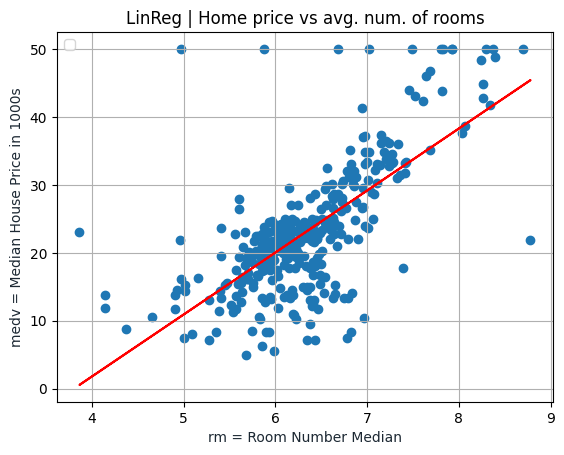

In [4]:
X = df['rm']
y = df['medv']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = X_train.to_numpy().reshape(-1, 1)
y_train = y_train.to_numpy().reshape(-1, 1)

# Fit the linear regression model
reg = LinearRegression().fit(X_train, y_train)

# Predict on the training data and calculate the polynomial
pred_y_train = reg.predict(X_train)
polynomial = reg.coef_[0][0] * X_train + reg.intercept_[0]

# Plot the results
plt.plot(X_train, polynomial, '-r')
plt.scatter(X_train, y_train)
plt.title('LinReg | Home price vs avg. num. of rooms')
plt.xlabel('rm = Room Number Median', color='#1C2833')
plt.ylabel('medv = Median House Price in 1000s', color='#1C2833')
plt.legend(loc='upper left')
plt.grid()
plt.show()



#### c) Bestimmtheitsmaß

* Berechnen Sie auf dem Trainingsdatensatz die Größen $RSS$, $ESS$ und $TSS$ (vgl. Vorlesung) und verwenden Sie diese, um das Bestimmtheitsmaß $R^2=1-\frac{RSS}{TSS}$ zu berechnen. 
* Verifizieren Sie das Ergebnis für das Bestimmtheitsmaß, indem Sie es zusätzlich mit Hilfe der Methode `LinearRegression.score` berechnen. 
* Vergleichen Sie das Ergebnis mit dem Wert $\frac{ESS}{TSS}$.
* Wiederholen Sie anschließend die obigen Berechnungen auf dem Testdatensatz und vergleichen Sie die Ergebnisse.

Berechnungen auf dem Trainingsdatensatz

In [5]:
rss = np.sum(np.power((pred_y_train - y_train),2))
tss = np.sum(np.power((y_train - y_train.mean()),2))
ess = np.sum(np.power((pred_y_train - y_train.mean()),2))

bhm = 1-rss/tss
bhm

0.4878892853275991

In [6]:
reg.score(X_train, y_train)

0.4878892853275991

Berechnungen auf dem Testdatensatz

In [7]:
X_test = X_test.to_numpy().reshape(-1, 1)
y_test = y_test.to_numpy().reshape(-1, 1)

# Fit the linear regression model
reg_test = LinearRegression().fit(X_test, y_test)

# Predict on the training data and calculate the polynomial
pred_y_test = reg_test.predict(X_test)

rss = np.sum(np.power((pred_y_test - y_test),2))
tss = np.sum(np.power((y_test - y_test.mean()),2))
ess = np.sum(np.power((pred_y_test - y_test.mean()),2))

bhm = 1-rss/tss
bhm

0.46034302907799207

In [8]:
reg_test.score(X_test, y_test)

0.46034302907799207

#### d) Residualdiagramm

Erstellen Sie auf dem Testdatensatz ein Residual-Diagramm für das obige Modell. Verwenden Sie dazu die Funktion `matplotlib.pyplot.scatter`.

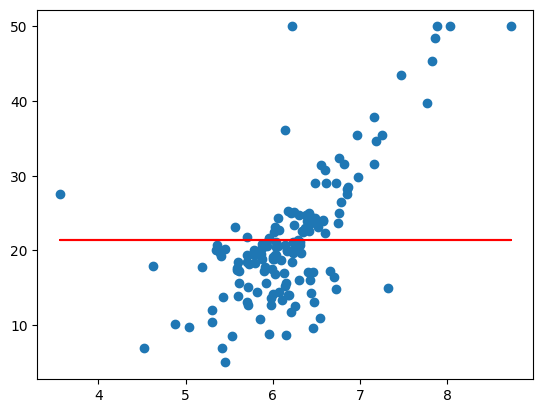

In [22]:
y_test_mean = y_test.mean() + y_test*0


plt.plot(X_test, y_test_mean, '-r')
plt.scatter(X_test, y_test)
plt.show()


## Aufgabe 2 

In dieser Aufgabe wollen wir mit Hilfe von Scikit-learn ein (univariates) polynomiales Regressionsmodell unter Verwendung der Least-Squares-Regression erstellen. Dazu werden zunächst synthetische Daten erzeugt:

In [9]:
m = 20

In [10]:
data_x = np.linspace(0,5,m)
data_y = 0.5*data_x+1+np.random.rand(len(data_x))

#### Visualisierung der Daten

Text(0, 0.5, 'y')

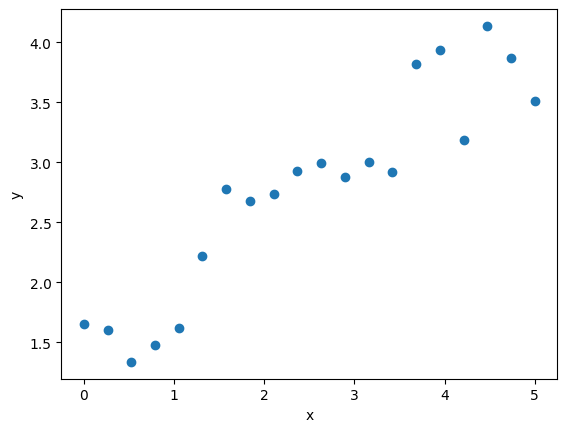

In [11]:
plt.scatter(data_x, data_y)
plt.xlabel('x')
plt.ylabel('y')

#### a) Linearer Modellansatz

Fitten Sie ein Lineares Regressionsmodell der Form $y=\theta_0+\theta_1x$ unter Verwendung des Least Squares-Ansatzes in diese Punkte und visualisieren Sie das Ergebnis in einem Diagramm, in welchem die Regressionsgerade und die gegebenen Punkte eingezeichnet sind.

In [27]:
data_x_matrix = np.c_[np.ones(len(data_x)), data_x  ]   
data_x_matrix
#Formula: XtXO = Xty
left = np.matmul(data_x_matrix.transpose(), data_x_matrix)
right = np.matmul(data_x_matrix.transpose(),data_y)

res4 = np.linalg.solve(left,right)
res4

array([1.47003729, 0.51766953])

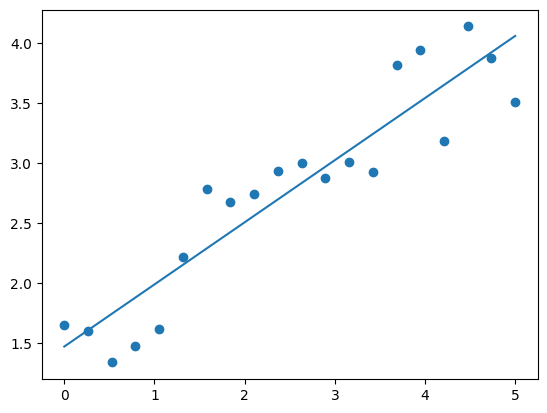

In [34]:
poly = res4[0]+ res4[1]*data_x
plt.plot(data_x, poly)
plt.scatter(data_x, data_y)

#### b) Polynomialer Modellansatz

Im folgenden soll ein Modell mit einem polynomialen Ansatz der Form $y=\theta_0+\theta_1x+\ldots+\theta_dx^d$ unter Verwendung eines Least-Squares-Ansatzes in die Daten gefittet werden, wobei $d$ den zu verwendenden Polynomgrad bezeichne. Dies funktioniert in Scikit-learn durch Einführung polynomialer Features $\tilde{x}_i = x^i$
und anschließende Bestimmung der Parameter $\theta_0, \theta_1,\ldots,\theta_d$ durch ein multivariates Lineares Regressionsmodell der Gestalt $y=\theta_0+\theta_1\tilde{x}_1+\ldots+\theta_d\tilde{x}_d$. 

Erzeugen Sie mit Hilfe der Klasse `PolynomialFeatures` aus `sklearn.preprocessing` (vgl. <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html">Doku</a>) eine Feature-Matrix der Gestalt $$X=\left(\begin{array}{rrrr}1&x_1&x_1^2&\ldots& x_1^d\\1& x_2& x_2^2&\ldots & x_2^d\\ \vdots & \vdots & \vdots & \ddots & \vdots \\ 1 & x_m & x_m^2&\ldots & x_m^d \end{array}\right)$$ mit polynomialen Features bis zum Grad $d$. <br>

<h2>Mein Ansatz</h2>

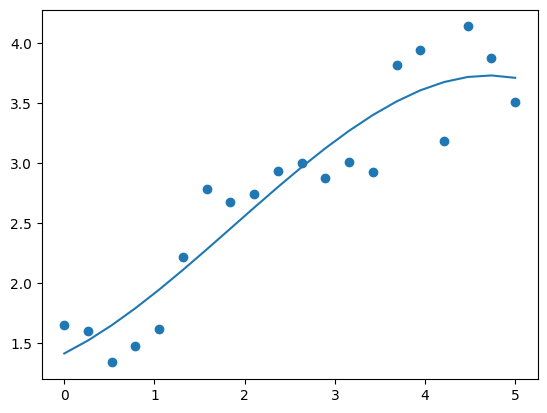

In [37]:
data_x_matrix = np.c_[np.ones(len(data_x)), data_x, np.power(data_x,2), np.power(data_x,3)]   
data_x_matrix
#Formula: XtXO = Xty
left = np.matmul(data_x_matrix.transpose(), data_x_matrix)
right = np.matmul(data_x_matrix.transpose(),data_y)

res = np.linalg.solve(left,right)
poly = res[0]+ res[1]*data_x + res[2]*np.power(data_x,2) + res[3]*np.power(data_x,3)
plt.plot(data_x, poly)
plt.scatter(data_x, data_y)

<h2>Sklearn Ansatz</h2>

In [40]:
from sklearn.preprocessing import PolynomialFeatures

#grad des polynoms festlegen
d = 3

data_x = data_x.reshape(-1, 1)
poly = PolynomialFeatures(degree = d)
X_poly = poly.fit_transform(data_x)

# Fit the linear regression model using the polynomial features
regressor = LinearRegression()
regressor.fit(X_poly, data_y)

# Predict the values for the original X data
y_pred = regressor.predict(X_poly)



Coefficients:  [ 0.          0.37350855  0.15459771 -0.02748266]
Intercept:  1.4122572767963883


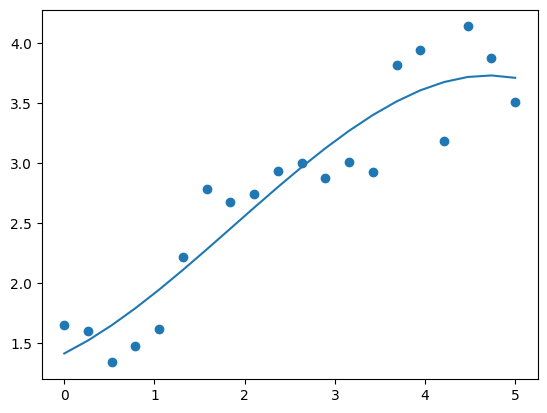

In [42]:
plt.plot(data_x, y_pred)
plt.scatter(data_x, data_y)

#### c) Modellergebnisse

Geben Sie die ermittelten Parameter $\theta_0,\ldots,\theta_d$ aus. Bestimmen Sie diese außerdem durch Lösen der Normalgleichungen(MEIN ANSATZ) und vergleichen Sie die Ergebnisse. Was stellen Sie fest, wenn Sie $d$ schrittweise erhöhen?

In [44]:
# Print the coefficients and intercept of the model
print("Coefficients: ", regressor.coef_)
print("Intercept: ", regressor.intercept_)

Coefficients:  [ 0.          0.37350855  0.15459771 -0.02748266]
Intercept:  1.4122572767963883


#### e) Bestimmtheitsmaß

Berechnen Sie das Bestimmtheitsmaß zu dem resultierenden Regressions-Polynom.

In [45]:
rss = np.sum(np.power((y_pred - data_y),2))
tss = np.sum(np.power((data_y - data_y.mean()),2))
ess = np.sum(np.power((y_pred - data_y.mean()),2))

bhm = 1-rss/tss
bhm

0.8787653306658298